In [47]:
import os
import pandas as pd
import numpy as np

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
os.listdir()

['.ipynb_checkpoints',
 'cross_validation.ipynb',
 'Model_Selection.ipynb',
 'Housing.csv',
 'grid_search_image.png',
 'cv.png',
 'CarPrice_Assignment.csv']

In [35]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [37]:
var_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

df[var_list] = df[var_list].apply(lambda x: x.map({'no':0, 'yes':1}))
df[var_list].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


In [38]:
status_ = pd.get_dummies(df.furnishingstatus, drop_first=True)
df_ = pd.concat([df, status_], axis=1)

In [41]:
df_ = df_.drop(['furnishingstatus'], axis=1)
df_.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [42]:
from sklearn.model_selection import train_test_split

In [54]:
df_train, df_test = train_test_split(df_, train_size=0.7, random_state=10)

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()

In [55]:
num_list = ['price','area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df_train[num_list] = scaler.fit_transform(df_train[num_list])
df_test[num_list] = scaler.transform(df_test[num_list])

In [56]:
y_train = df_train.pop('price')
X_train = df_train.copy()

In [58]:
y_test = df_test.pop('price')
X_test = df_test.copy()

## The number of features act as a Hyperparameter

In [59]:
from sklearn.linear_model import LinearRegression

In [61]:
from sklearn.feature_selection import RFE

In [63]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
rfe = RFE(lm, 10)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [66]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', False, 3),
 ('basement', True, 1),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [67]:
y_test_pred_10 = rfe.predict(X_test)

In [68]:
from sklearn.metrics import r2_score

In [69]:
r2_score(y_test, y_test_pred_10)

0.7264967387508805

In [70]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 6)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=6, step=1, verbose=0)

In [72]:
y_test_pred_6 = rfe.predict(X_test)

r2_score(y_test, y_test_pred_6)

0.6743571227749148

## Problems with current approach

The current approach is very manual especially the choosing of features during RFE.
Also in the current aproach we divide the data into training and testing sets and use test set for hyperparameter tuning. This is unfair since the test set is used for finetuning and is not totally unseen. There are two ways we can solve this problem. 

1) Use a validation set for hyperparameter tuning

2) Use cross validation

Approach 2 is especially useful when the dataset is small since validation set eats into training set. 
Approach 2 also ensures that we dont have single validation+train dataset like in approach 1 since there is a possiblity of biased data in the train/validation set.

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [80]:
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores

array([0.58650028, 0.61876338, 0.60394878, 0.59102002, 0.62934573])

In [85]:
folds = KFold(n_splits=5, shuffle=True, random_state=10)

In [86]:
cross_val_score(lm, X_train, y_train, cv=folds)

array([0.59618864, 0.64106436, 0.63557953, 0.57951926, 0.66249773])

kfold divides the training data into 5 splits. Each time one split is validation set and the rest is training set. Since we have 5 splits we shall have 5 models each evaluating a different test split each time.

In [95]:
cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=folds)

array([-0.01460719, -0.01254593, -0.00872731, -0.0089284 , -0.00729593])

## Use grid cross validation for hyper parameter tuning

In [98]:
folds = KFold(shuffle=True, random_state=10)

In [112]:
hyper_parameters = [{'n_features_to_select' : list(range(1,14))}]

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [114]:

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)
model_cv = GridSearchCV(estimator=rfe,
                            param_grid=hyper_parameters,
                            scoring='r2',
                            cv=folds,
                            verbose=1,
                            return_train_score=True
                           )

In [115]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [118]:
cv_Results = pd.DataFrame(model_cv.cv_results_)

In [120]:
cv_Results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_features_to_select', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [122]:
imp_cols=['param_n_features_to_select', 'mean_test_score', 'mean_train_score']
cv_Results[imp_cols]

,param_n_features_to_select,mean_test_score,mean_train_score
0,1,0.280056,0.292868
1,2,0.440094,0.449397
2,3,0.471696,0.498753
3,4,0.485087,0.532147
4,5,0.513687,0.560520
5,6,0.541970,0.585683
6,7,0.580326,0.615226
7,8,0.599344,0.630838
8,9,0.602561,0.643075
9,10,0.611799,0.651550


In [124]:
import matplotlib.pyplot as plt

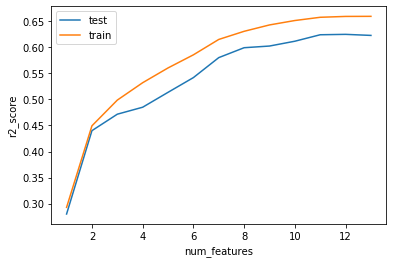

In [134]:
plt.plot(cv_Results.param_n_features_to_select, cv_Results.mean_test_score, label='test')
plt.plot(cv_Results.param_n_features_to_select, cv_Results.mean_train_score, label='train')
plt.xlabel('num_features')
plt.ylabel('r2_score')
plt.legend(loc='upper left')
plt.show()

In [131]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 11)
rfe.fit(X_train, y_train)

y_pred = rfe.predict(X_test)

In [132]:
r2_score(y_pred, y_test)

0.6795801247151207